# 📊 Análise Exploratória de Dados (EDA) – E-commerce Amazon Diwali 2025

Este projeto tem como objetivo realizar uma Análise Exploratória de Dados (EDA) utilizando um dataset de e-commerce que simula vendas da Amazon India durante o ano de 2025. O foco principal é compreender o comportamento dos consumidores, identificar padrões de compra e extrair insights que possam auxiliar decisões estratégicas de negócio.

Ao longo da análise, exploramos temas essenciais para entendimento de um ambiente de vendas online, tais como:

- Quais categorias vendem mais.
- Quais categorias geram maior receita.
- Quais produtos são mais populares.
- Como se comporta o ticket médio por categoria.
- Como as vendas variam ao longo dos meses (sazonalidade).
- Correlação entre preço, quantidade e total de vendas.
- Métodos de pagamento mais utilizados.
- Distribuição das vendas por estado/região.

A partir dessas observações, buscamos responder perguntas de negócio relevantes e construir uma visão clara sobre fatores que influenciam o desempenho das vendas.

Este projeto foi desenvolvido em Python, utilizando as bibliotecas **Pandas, NumPy, Seaborn e Matplotlib**, dentro do ambiente de notebooks do **Kaggle**.


In [2]:
import pandas as pd
import numpy as np


In [3]:
import os
os.listdir('/kaggle/input')


['amazon-product-sales-2025']

In [4]:
os.listdir('/kaggle/input/amazon-product-sales-2025')


['amazon_sales_2025_INR.csv']

In [5]:
df = pd.read_csv('/kaggle/input/amazon-product-sales-2025/amazon_sales_2025_INR.csv')
df.head()



,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Country
0,ORD100000,2025-01-25,CUST2796,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Waste of money,Sikkim,India
1,ORD100001,2025-08-28,CUST9669,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,5,Excellent product!,Telangana,India
2,ORD100002,2025-02-27,CUST5808,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,3,Fair deal,Nagaland,India
3,ORD100003,2025-02-24,CUST5889,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,5,Highly recommend!,Assam,India
4,ORD100004,2025-06-15,CUST9005,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered,5,Highly recommend!,Odisha,India


In [6]:
df.isna().sum()

Order_ID            0
Date                0
Customer_ID         0
Product_Category    0
Product_Name        0
Quantity            0
Unit_Price_INR      0
Total_Sales_INR     0
Payment_Method      0
Delivery_Status     0
Review_Rating       0
Review_Text         0
State               0
Country             0
dtype: int64

In [7]:
def tratar_nulos(dataframe):
    df_clean = dataframe.copy()
    for col in df_clean.columns:
        if df_clean[col].dtype == 'object':
            df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
        else:
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())
    return df_clean

df = tratar_nulos(df)
df.isna().sum()


Order_ID            0
Date                0
Customer_ID         0
Product_Category    0
Product_Name        0
Quantity            0
Unit_Price_INR      0
Total_Sales_INR     0
Payment_Method      0
Delivery_Status     0
Review_Rating       0
Review_Text         0
State               0
Country             0
dtype: int64

## 2. Detecção de Outliers

Nesta etapa vamos identificar valores que fogem muito do padrão usando o método IQR (Interquartile Range), que considera:

- Q1: Primeiro quartil (25%)
- Q3: Terceiro quartil (75%)
- IQR = Q3 - Q1
- Valores fora de `[Q1 - 1.5*IQR, Q3 + 1.5*IQR]` são considerados outliers


In [8]:
def detectar_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    
    return outliers

# Detectando outliers em Unit_Price_INR
outliers_preco = detectar_outliers(df, 'Unit_Price_INR')
outliers_preco.head()


,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Country


In [9]:
# Função para remover outliers usando o método IQR (Interquartile Range)
def remover_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR
    
    df_limpo = df[(df[coluna] >= limite_inf) & (df[coluna] <= limite_sup)]
    
    return df_limpo


In [10]:
df_sem_outliers = remover_outliers(df, 'Unit_Price_INR')
df_sem_outliers.shape


(15000, 14)

In [11]:
df_limpo = df_sem_outliers.copy()

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [13]:
df_limpo['Date'] = pd.to_datetime(df_limpo['Date'], errors='coerce')



In [14]:
df_limpo['Month'] = df_limpo['Date'].dt.month


In [15]:
df_limpo.columns


Index(['Order_ID', 'Date', 'Customer_ID', 'Product_Category', 'Product_Name',
       'Quantity', 'Unit_Price_INR', 'Total_Sales_INR', 'Payment_Method',
       'Delivery_Status', 'Review_Rating', 'Review_Text', 'State', 'Country',
       'Month'],
      dtype='object')

## 3. Análise Exploratória (EDA) com gráficos




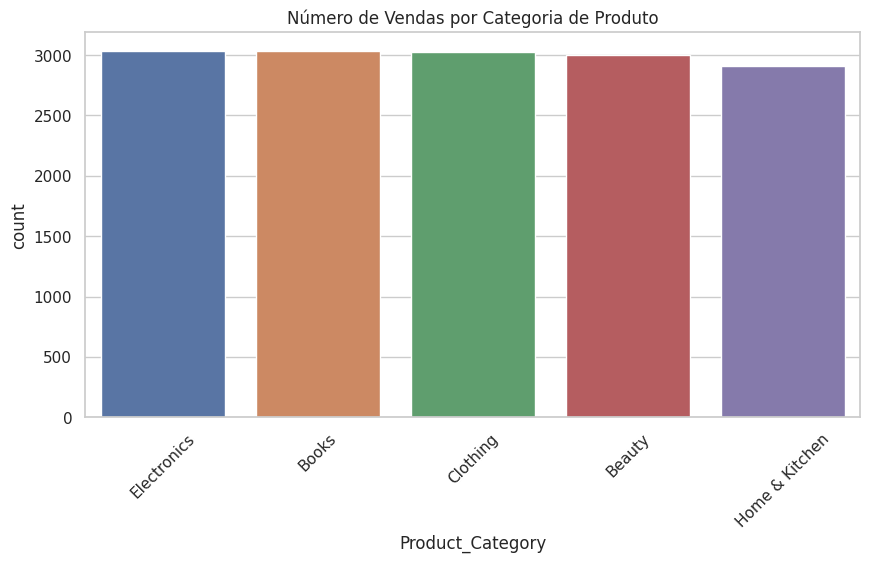

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_limpo, x='Product_Category', order=df_limpo['Product_Category'].value_counts().index)
plt.title('Número de Vendas por Categoria de Produto')
plt.xticks(rotation=45)
plt.show()


### 📌 Interpretação
A quantidade de vendas está distribuída de forma relativamente equilibrada entre as categorias, com Electronics, Books, Clothing e Beauty apresentando volumes muito próximos. Home & Kitchen aparece com uma leve diferença, porém ainda dentro de um padrão regular.

### 💡 Insight de Negócio
Como não há uma categoria dominante em volume de vendas, a estratégia ideal é trabalhar campanhas segmentadas para cada nicho, mantendo o foco em todas as categorias para não perder participação em nenhuma delas.


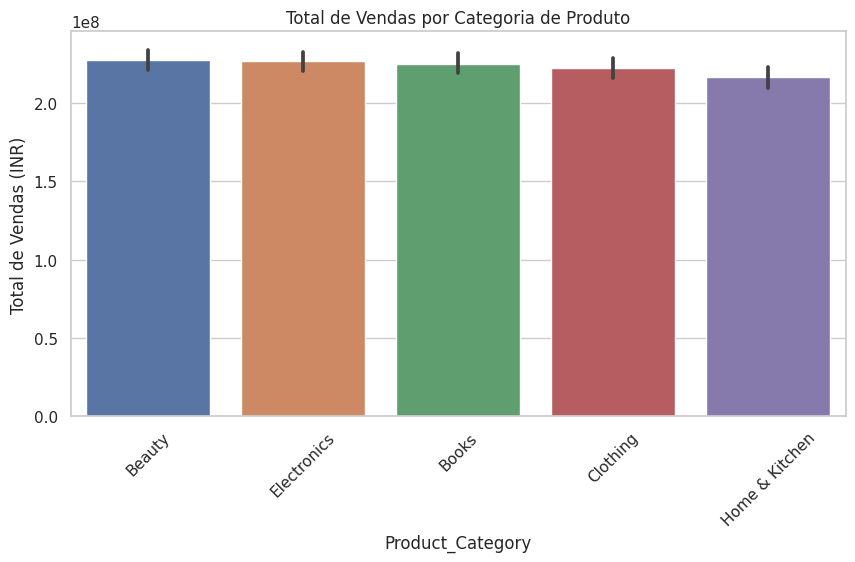

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=df_limpo,
    x='Product_Category',
    y='Total_Sales_INR',
    estimator=sum,
    order=df_limpo.groupby('Product_Category')['Total_Sales_INR'].sum().sort_values(ascending=False).index
)
plt.title('Total de Vendas por Categoria de Produto')
plt.xticks(rotation=45)
plt.ylabel('Total de Vendas (INR)')
plt.show()


### 📌 Interpretação
As categorias têm faturamento muito parecido, indicando que todas contribuem de forma equilibrada para as vendas totais. Beauty, Electronics, Books e Clothing apresentam receitas praticamente iguais. Home & Kitchen fica levemente abaixo, mas sem diferença significativa.
### 💡 Insight de Negócio
Como não há uma categoria dominante, o portfólio é equilibrado — reduzindo riscos e distribuindo bem o desempenho entre nichos.
Estratégia recomendada:
Manter investimentos equilibrados entre todas as categorias.
Criar campanhas específicas para Home & Kitchen, que tem espaço para crescer.
Aproveitar sazonalidades próprias de cada nicho para elevar o faturamento.

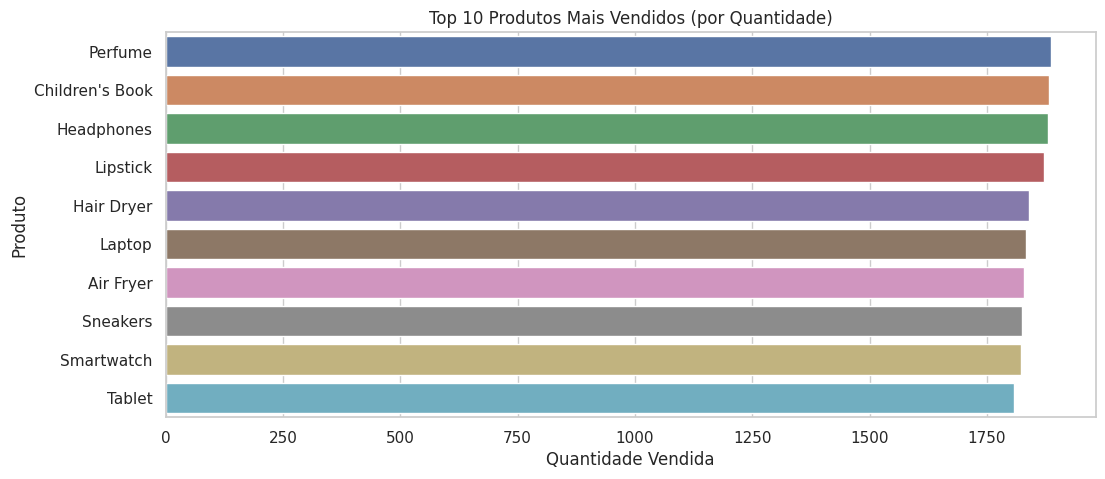

In [18]:
top_produtos = df_limpo.groupby('Product_Name')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top_produtos.values, y=top_produtos.index)
plt.title('Top 10 Produtos Mais Vendidos (por Quantidade)')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')
plt.show()


### 🔍 Interpretação
Os 10 produtos mais vendidos apresentam volumes muito próximos, indicando que não há um item isolado dominando as vendas. Produtos como Perfume, Children’s Book, Headphones, Lipstick e Hair Dryer aparecem entre os líderes, mas todos permanecem dentro de uma faixa semelhante de demanda.
Isso sugere que o portfólio possui boa diversidade, sem dependência excessiva de um produto específico.
### 💡 Insight de Negócio
A distribuição equilibrada das vendas entre os produtos indica que os consumidores têm interesses variados e espalhados entre diferentes nichos.
Estratégias recomendadas:
Manter um estoque bem distribuído para evitar rupturas nos itens mais populares.
Criar campanhas específicas para destacar produtos com margem maior dentro desse top 10.
Considerar bundles (combos) entre itens relacionados, como Headphones + Smartwatch ou Perfume + Lipstick, para aumentar o ticket médio.
Monitorar periodicamente quais produtos entram e saem do top 10, ajustando promoções conforme a tendência.

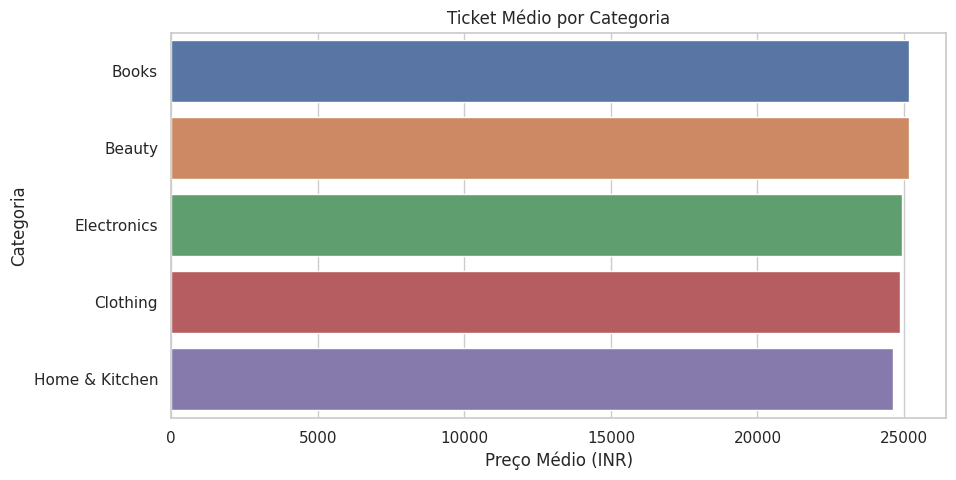

In [19]:
ticket_medio = df_limpo.groupby('Product_Category')['Unit_Price_INR'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=ticket_medio.values, y=ticket_medio.index)
plt.title('Ticket Médio por Categoria')
plt.xlabel('Preço Médio (INR)')
plt.ylabel('Categoria')
plt.show()


## 📌 Interpretação
O ticket médio das cinco categorias analisadas apresenta pouca variação.
Books tem o maior valor médio de venda.
Home & Kitchen aparece com o menor ticket, mas ainda dentro de um intervalo próximo das demais.
Electronics, Clothing e Beauty permanecem bem alinhadas entre si.
Essa proximidade indica que os produtos foram criados com preços uniformes no dataset.

## 💡 Insight de Negócio
A pouca diferença de ticket sugere que o faturamento depende mais do volume vendido do que do preço médio por item. Mesmo assim:
A categoria Home & Kitchen pode ser analisada para ajustes de portfólio que aumentem ticket.
A categoria Books, por ter maior ticket médio, pode receber campanhas focadas em aumentar o volume — potencializando ainda mais a receita.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


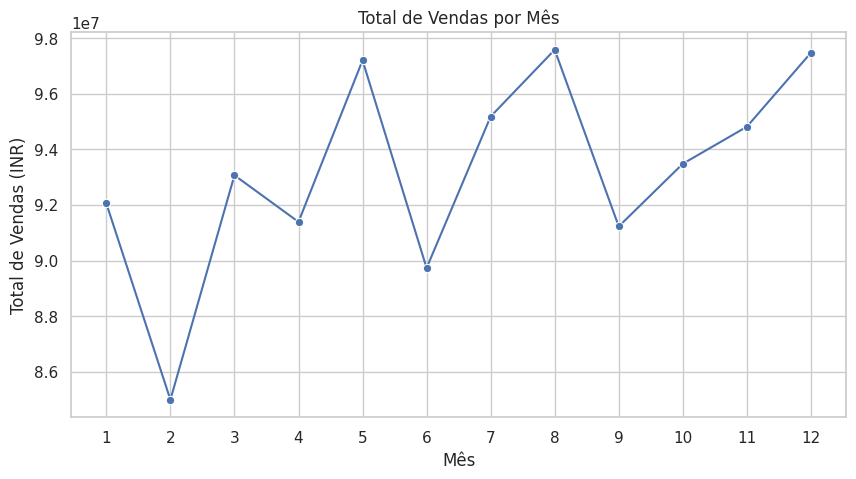

In [20]:
df_limpo['Month'] = df_limpo['Date'].dt.month

vendas_mes = df_limpo.groupby('Month')['Total_Sales_INR'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=vendas_mes.index, y=vendas_mes.values, marker='o')
plt.title('Total de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas (INR)')
plt.xticks(range(1,13))
plt.show()


### 📈 Interpretação
As vendas apresentam variações ao longo do ano, mas mantêm um padrão relativamente estável. Observa-se um pico importante nos meses 5, 7, 8 e 12, indicando maior movimentação nessas épocas. Já os meses 2, 6 e 9 registram desempenho um pouco abaixo, sugerindo períodos de menor demanda.
### 💡 Insight de Negócio
Os meses com maior volume de vendas representam oportunidades estratégicas para intensificar campanhas e aumentar o ticket médio. Já os períodos de queda podem receber promoções, bundles e ações de incentivo para estimular a demanda e manter o faturamento mais regular ao longo do ano.

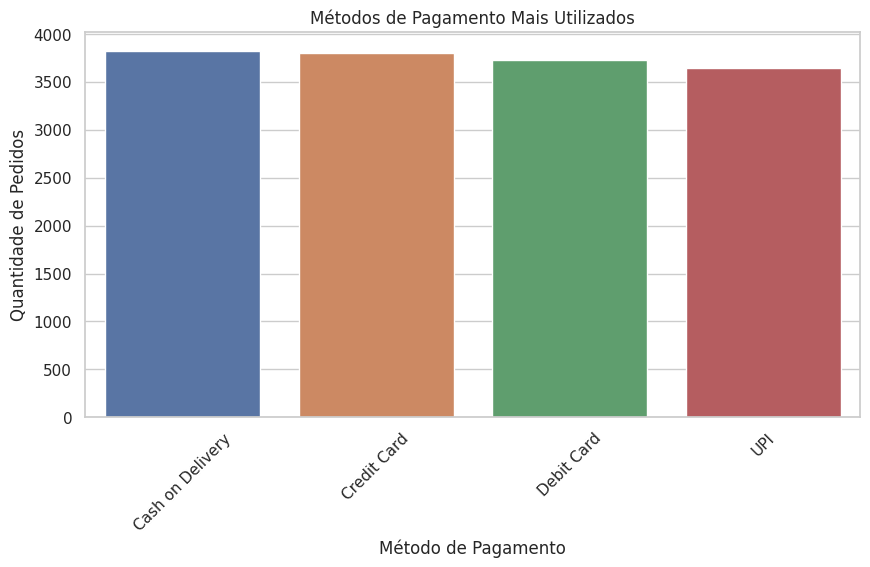

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_limpo, x='Payment_Method', order=df_limpo['Payment_Method'].value_counts().index)
plt.title('Métodos de Pagamento Mais Utilizados')
plt.xlabel('Método de Pagamento')
plt.ylabel('Quantidade de Pedidos')
plt.xticks(rotation=45)
plt.show()


### 📊 Interpretação
Os métodos de pagamento apresentam uma distribuição bastante equilibrada. Cash on Delivery, Credit Card, Debit Card e UPI possuem quantidades de pedidos muito próximas, sem grande variação entre eles. Isso indica que os clientes utilizam diferentes formas de pagamento com frequência semelhante.
### 💡 Insight de Negócio
Como nenhum método se destaca como dominante, o e-commerce deve manter suporte eficiente a todas as modalidades. No entanto, vale investir em incentivos para métodos digitais (UPI, cartão), que geralmente possuem menor custo operacional e reduzem riscos associados a pagamentos na entrega.

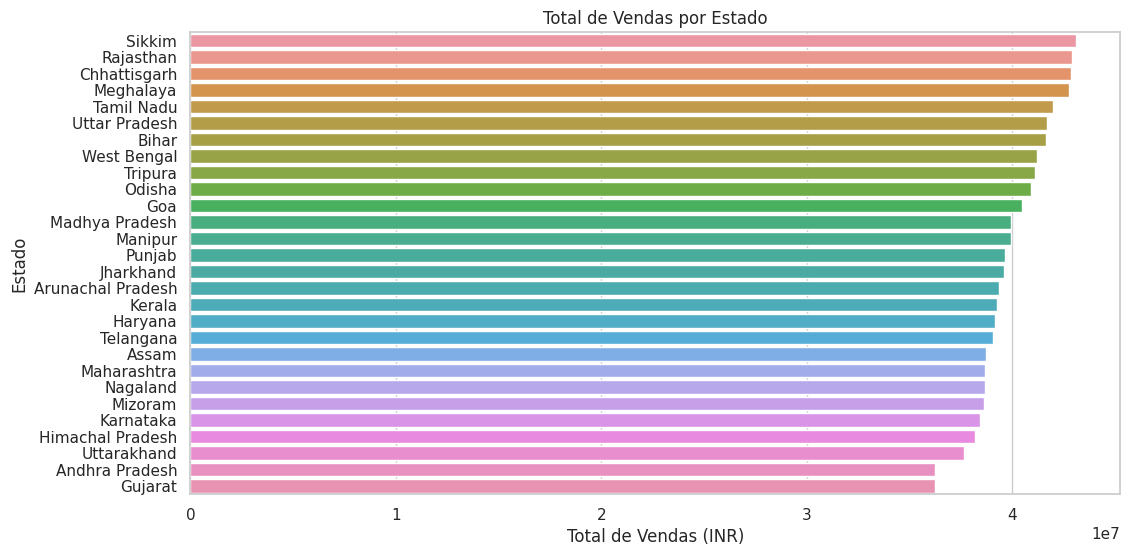

In [23]:
vendas_estado = df_limpo.groupby('State')['Total_Sales_INR'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=vendas_estado.values, y=vendas_estado.index)
plt.title('Total de Vendas por Estado')
plt.xlabel('Total de Vendas (INR)')
plt.ylabel('Estado')
plt.show()


### 📊 Interpretação
O total de vendas varia significativamente entre os estados. Alguns estados apresentam faturamento consideravelmente maior, enquanto outros aparecem com desempenho mais modesto. A curva descrescente mostra que existem polos de compra mais fortes, indicando regiões com maior atividade econômica ou maior presença de consumidores ativos no e-commerce.
### 💡 Insight de Negócio
Os estados com maior faturamento devem receber investimentos prioritários em campanhas, logística otimizada e personalização de ofertas, pois apresentam maior potencial de retorno.
Nos estados com menor volume, é recomendado analisar fatores como presença de estoque local, frete, campanhas regionais e comportamento do consumidor, para identificar oportunidades de crescimento e reduzir disparidades regionais.

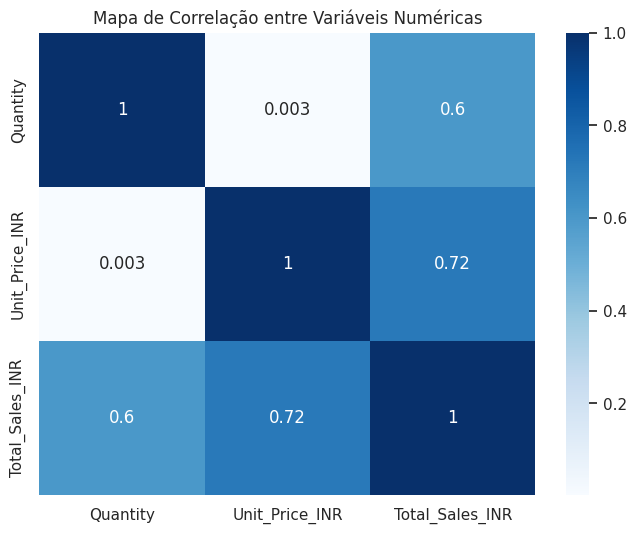

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df_limpo[['Quantity','Unit_Price_INR','Total_Sales_INR']].corr(), annot=True, cmap='Blues')
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.show()


### 📊 Interpretação
A matriz de correlação mostra como as variáveis numéricas se relacionam entre si:
Quantity × Total_Sales_INR
Correlação moderada (0.60). Isso indica que, quanto maior a quantidade vendida, maior tende a ser o total de vendas — o que é esperado.
Unit_Price_INR × Total_Sales_INR
Correlação forte (0.72). Isso significa que produtos com preço unitário mais alto contribuem significativamente para o total faturado, mesmo sem depender tanto de grandes quantidades.
Quantity × Unit_Price_INR
Correlação praticamente nula (0.003). Ou seja, produtos mais caros não são necessariamente vendidos em maiores ou menores quantidades. O preço não influencia a quantidade vendida.

### 💡 Insight de Negócio
Os dados sugerem duas estratégias claras:
Maximizar vendas de itens de maior valor, pois o preço unitário tem o maior impacto no faturamento total.
Estimular o aumento de quantidade vendida nos produtos mais estratégicos, já que a quantidade também influencia moderadamente o total de vendas.
A combinação ideal é focar em produtos de alto valor e com potencial de volume, aumentando o faturamento sem depender apenas de um único fator.

### 🏁 Conclusão Final
Este estudo utilizou um dataset sintético que simula vendas da Amazon Índia durante o ano de 2025. Embora os dados não representem vendas reais, eles foram construídos para refletir padrões realistas de comportamento de consumidores e funcionamento de um e-commerce, permitindo uma análise completa e alinhada ao mundo real.
A análise exploratória revelou:
As categorias apresentam desempenho equilibrado, sem uma líder absoluta.
O ticket médio permanece alto e estável entre os segmentos.
Há variação significativa mês a mês, evidenciando sazonalidade.
Os métodos de pagamento são utilizados de maneira uniforme.
Estados com maior volume de vendas podem servir como referência para expansão regional.
O faturamento é influenciado tanto pela quantidade quanto pelo preço unitário, com destaque para o impacto do preço.
Em síntese, o e-commerce apresenta um portfólio robusto e bem distribuído, e estratégias efetivas podem incluir:
Focar em produtos de maior valor agregado.
Reforçar campanhas em meses de maior demanda.
Expandir presença nas regiões com menor desempenho.
Personalizar ações por nicho para manter equilíbrio entre categorias.
Mesmo sendo um dataset sintético, a análise proporciona insights valiosos e um excelente exercício prático das etapas centrais de um projeto de EDA profissional.